C:\Users\y-kobayashi\Anaconda3\envs\rein-env\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


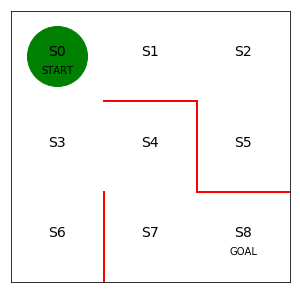

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(5,5))
ax = plt.gca()

plt.plot([1,1],[0,1],color='red', linewidth=2)
plt.plot([1,2],[2,2],color='red', linewidth=2)
plt.plot([2,2],[2,1],color='red', linewidth=2)
plt.plot([2,3],[1,1],color='red', linewidth=2)

plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

ax.set_xlim(0, 3)
ax.set_ylim(0, 3)

plt.tick_params(axis='both', which='both', bottom='off', top='off',
                labelbottom='off',right='off', left='off', labelleft='off')

line, = ax.plot([0.5], [2.5], marker="o",color='g', markersize=60)



In [2]:
def simple_convert_into_pi_from_theta(theta):
    
    [m,n] = theta.shape
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :]/np.nansum(theta[i, :])
    
    pi = np.nan_to_num(pi)
    
    return pi


In [3]:
def get_action(s, Q, epsilon, pi_0):
    
    direction = ["up", "right", "down", "left"]
    
    if np.random.rand() < epsilon:
        next_direction = np.random.choice(direction, p=pi_0[s, :])
    else:
        next_direction = direction[np.nanargmax(Q[s, :])]
    
    if next_direction == "up":
        action = 0
    if next_direction == "right":
        action = 1
    if next_direction == "down":
        action = 2
    if next_direction == "left":
        action = 3
    
    return action

def get_s_next(s, a, Q, epsilon, pi_0):
    
    direction = ["up", "right", "down", "left"]
    next_action = direction[a]
    
    if next_action == "up":
        s_next = s - 3
    if next_action == "right":
        s_next = s + 1
    if next_action == "down":
        s_next = s + 3
    if next_action == "left":
        s_next = s - 1

    return s_next

In [4]:
from collections import deque 

class Memory:
    
    def __init__(self, max_size=1000):
        self.buffer = deque(maxlen=max_size)
    
    def add(self, experience):
        self.buffer.append(experience)
        
    def sample(self):
        return self.buffer.pop()
    
    def len(self):
        return len(self.buffer)



In [5]:
def update_Q_montecarlo(Q, memory):
    
    eta = 0.5
    gamma = 0.9
    total_reward_t = 0
    
    while (memory.len() > 0):
        (s, a, r) = memory.sample()
        total_reward_t = gamma*total_reward_t
        
        Q[s,a] = Q[s,a] + eta*(r + total_reward_t - Q[s,a] )
        total_reward_t = total_reward_t + r
        
    return Q



In [9]:
def goal_maze_memory(Q, epsilon, pi):
    
    s = 0
    
    step = 0
    memory = Memory(max_size=1000)
    
    
    while step<1000:
        
        a = get_action(s, Q, epsilon, pi)
        s_next = get_s_next(s, a, Q, epsilon, pi)
        
        if s_next==8:
            r=1
        else:
            r=0
        
        memory.add((s, a, r))
        
        if s_next==8:
            break
        else:
            s = s_next
        
        step +=1
        
    return memory,step

#print(Q)
#q=Q
#for i in range(10):
#    q=goal_maze_ret_s_a_Q(Q, 0.1, 0.1, 0.9, pi_0)
#q

In [13]:

epsilon = 0.5
is_continue = True
episode = 1

theta_0 = np.array([[np.nan, 1, 1, np.nan], #S0
                    [np.nan, 1, np.nan, 1], #S1
                    [np.nan, np.nan, 1, 1], #S2
                    [1, 1, 1, np.nan], #S3
                    [np.nan, np.nan, 1, 1], #S4
                    [1, np.nan, np.nan, np.nan], #S5
                    [1, np.nan, np.nan, np.nan], #S6
                    [1, 1, np.nan, np.nan], #S7
                   ])
pi_0 = simple_convert_into_pi_from_theta(theta_0)

[a, b] = theta_0.shape
Q = np.random.rand(a, b)*theta_0*0.1

v = np.nanmax(Q, axis=1)

V =[]
V.append(np.nanmax(Q, axis=1))

while is_continue:
    
    print("エピソード：" + str(episode))
    epsilon = epsilon/2
    
    memory,step = goal_maze_memory(Q, epsilon, pi_0)
    update_Q_montecarlo(Q, memory)
    
    print("step = ",step)
    print(Q)
    print(" ")
    
    new_v = np.nanmax(Q, axis=1)
#     print(np.sum(np.abs(new_v - v)))
    v = new_v
    V.append(v)
    
    episode = episode +1
    if episode >100:
        break



エピソード：1
step =  15
[[       nan 0.02600165 0.13056587        nan]
 [       nan 0.05088618        nan 0.0687354 ]
 [       nan        nan 0.00058862 0.03914205]
 [0.06601631 0.30092154 0.0517873         nan]
 [       nan        nan 0.3222196  0.32272436]
 [0.04896994        nan        nan        nan]
 [0.0358915         nan        nan        nan]
 [0.34316493 0.53822174        nan        nan]]
 
エピソード：2
step =  21
[[           nan 2.60016482e-02 1.84206083e-01            nan]
 [           nan 5.08861835e-02            nan 6.87354014e-02]
 [           nan            nan 5.88621444e-04 3.91420482e-02]
 [2.07347374e-01 1.62367741e-01 2.41127255e-01            nan]
 [           nan            nan 6.11109800e-01 1.78108177e-01]
 [4.89699365e-02            nan            nan            nan]
 [2.57094198e-01            nan            nan            nan]
 [3.43164926e-01 7.69110871e-01            nan            nan]]
 
エピソード：3
step =  113
[[           nan 2.60016482e-02 1.93677397e-01          

[[           nan 2.60016482e-02 7.29000000e-01            nan]
 [           nan 5.08861835e-02            nan 6.87354014e-02]
 [           nan            nan 5.88621444e-04 3.91420482e-02]
 [3.69394187e-01 8.10000000e-01 9.80063887e-06            nan]
 [           nan            nan 9.00000000e-01 1.78108177e-01]
 [4.89699365e-02            nan            nan            nan]
 [1.08895987e-05            nan            nan            nan]
 [3.43164926e-01 1.00000000e+00            nan            nan]]
 
エピソード：87
step =  3
[[           nan 2.60016482e-02 7.29000000e-01            nan]
 [           nan 5.08861835e-02            nan 6.87354014e-02]
 [           nan            nan 5.88621444e-04 3.91420482e-02]
 [3.69394187e-01 8.10000000e-01 9.80063887e-06            nan]
 [           nan            nan 9.00000000e-01 1.78108177e-01]
 [4.89699365e-02            nan            nan            nan]
 [1.08895987e-05            nan            nan            nan]
 [3.43164926e-01 1.00000000e+00  

In [8]:
from matplotlib import animation
from IPython.display import HTML
import matplotlib.cm as cm

def init():
    
    line.set_data([], [])
    return (line,)


def animate(i):
    
    line, = ax.plot([0.5], [2.5], marker="s", color=cm.jet(V[i][0]), markersize=85)
    line, = ax.plot([1.5], [2.5], marker="s", color=cm.jet(V[i][1]), markersize=85)
    line, = ax.plot([2.5], [2.5], marker="s", color=cm.jet(V[i][2]), markersize=85)
    line, = ax.plot([0.5], [1.5], marker="s", color=cm.jet(V[i][3]), markersize=85)
    line, = ax.plot([1.5], [1.5], marker="s", color=cm.jet(V[i][4]), markersize=85)
    line, = ax.plot([2.5], [1.5], marker="s", color=cm.jet(V[i][5]), markersize=85)
    line, = ax.plot([0.5], [0.5], marker="s", color=cm.jet(V[i][6]), markersize=85)
    line, = ax.plot([1.5], [0.5], marker="s", color=cm.jet(V[i][7]), markersize=85)
    line, = ax.plot([2.5], [0.5], marker="s", color=cm.jet(1.0), markersize=85)

    return(line,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(V), interval=200, repeat=False)

HTML(anim.to_jshtml())